In [1]:
cd C:\Users\User\Documents\GitHub

C:\Users\User\Documents\GitHub


In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=99a741e4c0eec955d95fbaeb25f4ca05fd14d4ef9e070821e954533445cc7185
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [11]:
import wget 

In [12]:
wget.download("https://data-flair.s3.ap-south-1.amazonaws.com/Data-Science-Data/stock_data.zip")

'stock_data (2).zip'

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'keras'

In [9]:
df=pd.read_csv("stock_data.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'stock_data.csv'

In [6]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

NameError: name 'df' is not defined

In [7]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

NameError: name 'df' is not defined

In [8]:
new_dataset

NameError: name 'new_dataset' is not defined

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))

In [8]:
new_dataset

,Close
Date,
1984-09-07,0.42388
1984-09-10,0.42134
1984-09-11,0.42902
1984-09-12,0.41618
1984-09-13,0.43927
...,...
2017-11-09,175.25
2017-11-10,174.67
2017-11-10,302.99


In [9]:
scaled_data=scaler.fit_transform(new_dataset)

In [10]:
scaled_data

array([[0.0009266 ],
       [0.00092   ],
       [0.00093996],
       ...,
       [0.78694983],
       [0.21770761],
       [0.46343881]])

In [11]:
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [14]:
from keras.models import Sequential 
from keras.layers import Dense, Embedding 
from keras.layers import LSTM 
from keras.layers.wrappers import Bidirectional
from keras.layers import Dense, Lambda, dot, Activation, concatenate, Embedding, LSTM, Dropout

In [22]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')


In [23]:
lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [24]:
lstm_model.fit(x_train_data,y_train_data,epochs=5,batch_size=1,verbose=2)

Epoch 1/5
927/927 - 23s - loss: 1.8456e-06
Epoch 2/5
927/927 - 20s - loss: 1.0645e-06
Epoch 3/5
927/927 - 20s - loss: 1.0042e-06
Epoch 4/5
927/927 - 20s - loss: 9.3925e-07
Epoch 5/5
927/927 - 20s - loss: 7.9633e-07


In [26]:
lstm_model.save("model_train.h5")

In [27]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

<ipython-input-28-08cbe46260fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


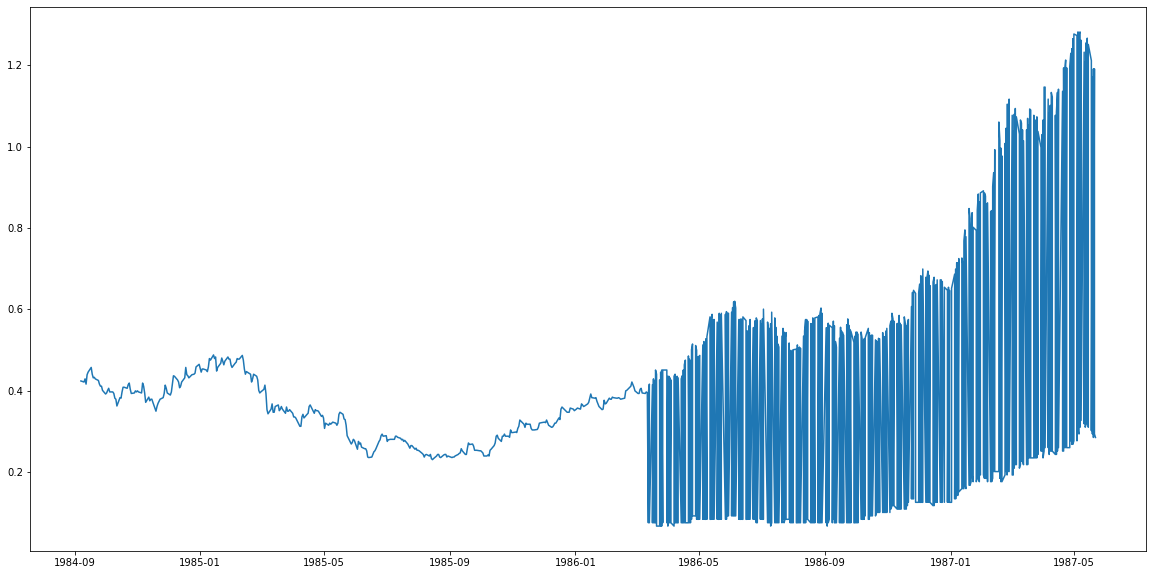

In [28]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])


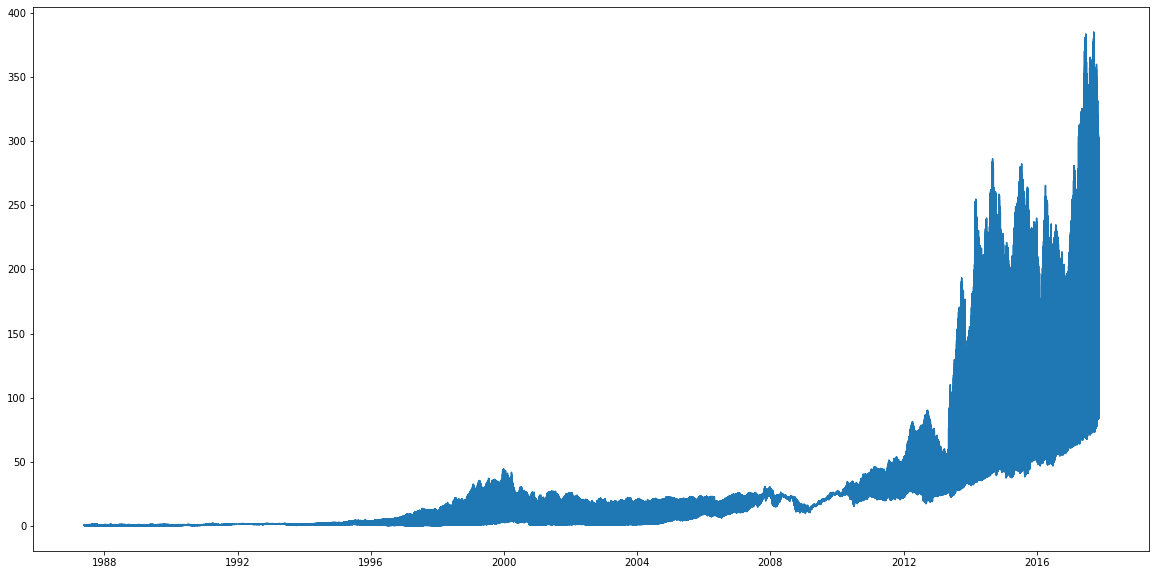

In [30]:
plt.plot(valid_data[['Close']])

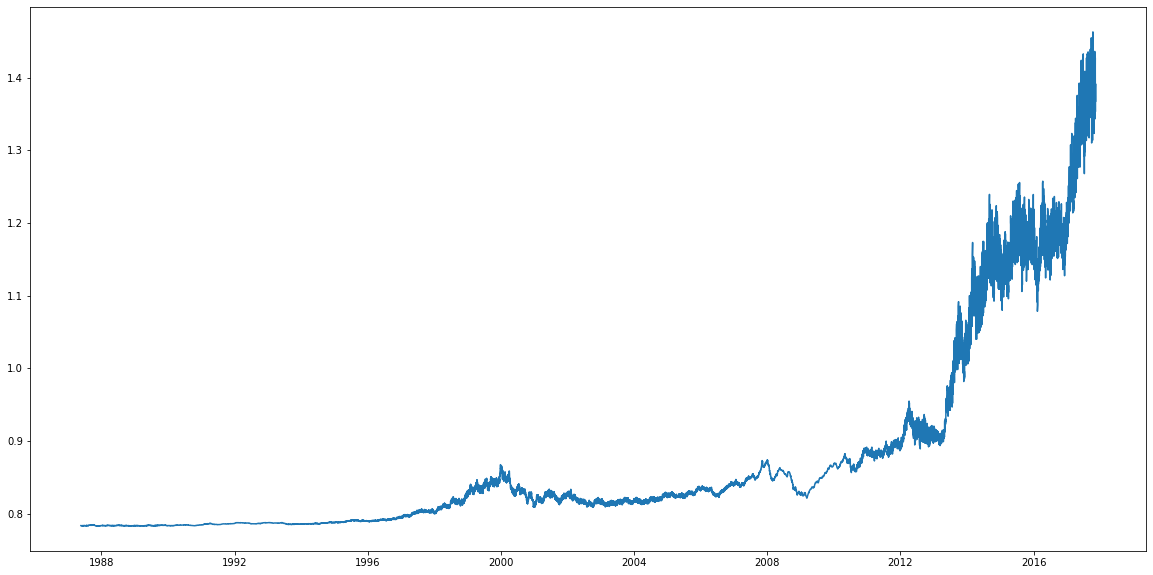

In [31]:
plt.plot(valid_data[["Predictions"]])